In [13]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import netCDF4
import scipy
from scipy import stats
def linr(a,b):
    slope, intercept, r_value, p_value, std_err = stats.linregress(a,b)
    return slope

In [14]:
nino = xr.open_dataset(r'C:\Users\lv299\OneDrive\Melbourne-Uni\Week 4\nino3.4.nc')
nino34 = nino.sst.loc['1981-01-01':'2021-12-01']
nino34 = nino34.resample(time ="M").mean(dim="time")
#chazhi_nino34 = nino34.value
nino34month = nino34.resample(time='QS-NOV').mean(dim="time")

ninoNDJ=nino34month[4::4]
ninoNDJ['time']=ninoNDJ['time.year']
ninoNDJ=ninoNDJ.rename({'time': 'Year'})


ds = ninoNDJ
climatology_mean = ds.mean("Year")
climatology_std = ds.std("Year")
stand_anomalies = xr.apply_ufunc(
    lambda x, m, s: (x - m) / s,
    ds,
    climatology_mean,
    climatology_std,
)

nino34 = stand_anomalies


In [15]:
t = nino34.Year
t

<xarray.DataArray 'Year' (Year: 41)>
array([1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021], dtype=int64)
Coordinates:
  * Year     (Year) int64 1981 1982 1983 1984 1985 ... 2017 2018 2019 2020 2021

In [30]:
f = xr.open_dataset(r'C:\Users\lv299\OneDrive\Melbourne-Uni\Week 3\olr.mon.mean.nc')
ds = f.olr
nds = ds.loc['1981-01-01':'2021-12-01',:,:]

olr = nds.resample(time='QS-DEC').mean(dim="time")

olrNDJ = olr[4::4]
print(olrNDJ)
olrNDJ['time']=olrNDJ['time.year']
olrNDJ=olrNDJ.rename({'time': 'Year'})



<xarray.DataArray 'olr' (time: 41, lat: 73, lon: 144)>
array([[[158.38695, 158.38695, 158.38695, ..., 158.38695, 158.38695,
         158.38695],
        [157.5981 , 157.55717, 157.49959, ..., 157.71332, 157.6769 ,
         157.63939],
        [157.68309, 157.51393, 157.32922, ..., 158.07457, 157.96985,
         157.83713],
        ...,
        [163.00323, 162.37459, 161.73079, ..., 164.82167, 164.22748,
         163.62367],
        [161.0703 , 160.7608 , 160.44508, ..., 161.96996, 161.67316,
         161.3742 ],
        [158.1971 , 158.1971 , 158.1971 , ..., 158.1971 , 158.1971 ,
         158.1971 ]],

       [[152.10219, 152.10219, 152.10219, ..., 152.10219, 152.10219,
         152.10219],
        [152.99672, 153.09303, 153.18835, ..., 152.67462, 152.78093,
         152.89284],
        [155.4818 , 155.7256 , 155.96504, ..., 154.68138, 154.95453,
         155.219  ],
...
        [161.11827, 161.11827, 161.11827, ..., 163.11444, 163.11444,
         163.11444],
        [161.23973, 161.23

In [31]:
result = np.apply_along_axis(lambda olrNDJ: linr(olrNDJ, ninoNDJ), axis=0, arr=olrNDJ)

reg =  xr.DataArray(result, coords= [olrNDJ.lat,olrNDJ.lon]) #converts the output to an xarray DataArray

In [32]:
print(reg.max())
print(reg.min())
lon = olrNDJ.lon
lat = olrNDJ.lat

<xarray.DataArray ()>
array(0.30994637)
<xarray.DataArray ()>
array(-0.34077188)


C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:256: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:256: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:402: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings.extend(multi_line_string)
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:402: ShapelyDeprecatio

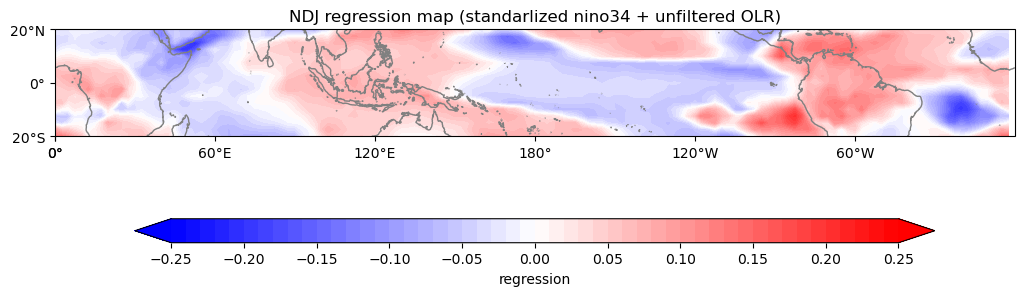

In [33]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature 
import cartopy.mpl.ticker as cticker 

leftlon, rightlon, lowerlat, upperlat = (0,420,-20,20)
img_extent = [leftlon, rightlon, lowerlat, upperlat]
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()

   
fig = plt.figure(figsize=(16,8))


ax = fig.add_axes([0.1, 0.2, 0.6, 0.6],projection = ccrs.PlateCarree(central_longitude=180),zorder=1)
ax.set_extent(img_extent, crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE,color='grey') 
ax.set_xticks(range(0,360+60,60), crs=ccrs.PlateCarree())
ax.set_yticks(range(-20,21,20), crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.title.set_text('NDJ regression map (standarlized nino34 + unfiltered OLR)')

c = ax.contourf(lon,lat,reg,
                levels=np.arange(-0.25,0.251,0.01),
                extend='both' ,
                cmap = plt.get_cmap('bwr'),
                transform=ccrs.PlateCarree(),zorder = 0)

fig.colorbar(c, cax=fig.add_axes([0.15, 0.3, 0.5, 0.03 ]),
             orientation='horizontal',  
             label= 'regression', 
             ticks=np.arange(-0.25,0.251,0.05),
             shrink=0.7)

In [34]:
f = xr.open_dataset(r'C:\Users\lv299\OneDrive\Melbourne-Uni\Week 4\Monday\correction.nc')
ds = f.__xarray_dataarray_variable__
nds = ds.loc['1981-01-01':'2021-12-01',:,:]

olr = nds.resample(time='QS-NOV').mean(dim="time")

olrNDJ = olr[4::4]
print(olrNDJ)
olrNDJ['time']=olrNDJ['time.year']
olrNDJ=olrNDJ.rename({'time': 'Year'})


<xarray.DataArray '__xarray_dataarray_variable__' (time: 41, lat: 25, lon: 144)>
array([[[-1.11910911e+00, -1.42878581e+00, -1.30601692e+00, ...,
         -7.39789497e-01, -1.26240024e+00, -1.22602518e+00],
        [-1.27815261e+00, -1.25524764e+00, -1.07799336e+00, ...,
         -1.41892026e+00, -1.65523556e+00, -1.73913745e+00],
        [-8.05851008e-01, -8.45216661e-01, -3.91573592e-01, ...,
         -1.44246029e+00, -1.41782550e+00, -9.00548409e-01],
        ...,
        [-2.07893135e-01, -3.65340193e-02,  7.18421285e-02, ...,
          3.68182047e-01, -5.44848599e-02, -8.64248153e-02],
        [-4.33665070e-01, -6.65222268e-02,  2.04504755e-01, ...,
          3.63810575e-01,  8.90833612e-02, -1.39467424e-01],
        [-2.08813605e-01, -2.37895799e-01,  1.62942025e-01, ...,
          1.19472447e-01,  2.30777631e-01, -1.25114900e-02]],

       [[-6.96992609e-01, -2.15983552e-01,  3.34617247e-01, ...,
         -5.53004682e-01, -1.08413662e+00, -8.89340916e-01],
        [-4.47451730e-

In [35]:
result = np.apply_along_axis(lambda olrNDJ: linr(olrNDJ, ninoNDJ), axis=0, arr=olrNDJ)

reg =  xr.DataArray(result, coords= [olrNDJ.lat,olrNDJ.lon]) #converts the output to an xarray DataArray

In [36]:
reg.min()

<xarray.DataArray ()>
array(-0.99978432)

C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:256: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:256: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:402: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings.extend(multi_line_string)
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:402: ShapelyDeprecatio

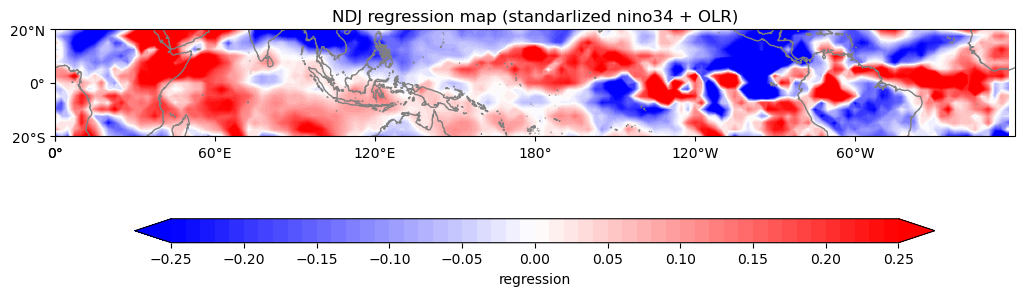

In [37]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature 
import cartopy.mpl.ticker as cticker 

leftlon, rightlon, lowerlat, upperlat = (0,420,-20,20)
img_extent = [leftlon, rightlon, lowerlat, upperlat]
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()

   
fig = plt.figure(figsize=(16,8))


ax = fig.add_axes([0.1, 0.2, 0.6, 0.6],projection = ccrs.PlateCarree(central_longitude=180),zorder=1)
ax.set_extent(img_extent, crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE,color='grey') 
ax.set_xticks(range(0,360+60,60), crs=ccrs.PlateCarree())
ax.set_yticks(range(-20,21,20), crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.title.set_text('NDJ regression map (standarlized nino34 + OLR)')

c = ax.contourf(olrNDJ.lon,olrNDJ.lat,reg,
                levels=np.arange(-0.25,0.251,0.01),
                extend='both' ,
                cmap = plt.get_cmap('bwr'),
                transform=ccrs.PlateCarree(),zorder = 0)

fig.colorbar(c, cax=fig.add_axes([0.15, 0.3, 0.5, 0.03 ]),
             orientation='horizontal',  
             label= 'regression', 
             ticks=np.arange(-0.25,0.251,0.05),
             shrink=0.7)